In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

year_ago = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
year_ago #2016-8-24

year_data = session.query(measurement).filter(measurement.date < dt.date(2016,8,24))

end_date = dt.datetime(2017, 8, 23)
start_date = dt.datetime(2016, 8, 24)

results = session.query(measurement.prcp, 
                        measurement.date).\
                  filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

precipitation = [{"Date": result[1], "PRCP": result[0]} for result in results]

precip_df = pd.DataFrame(precipitation)

unsorted_prcp_df = precip_df.set_index('Date')

prcp_df = unsorted_prcp_df.sort_values('PRCP')

final_prcp_df = prcp_df.dropna(how= 'any')
final_prcp_df

,PRCP
Date,
2017-04-04,0.00
2017-03-14,0.00
2017-03-18,0.00
2017-03-21,0.00
2017-03-22,0.00
...,...
2016-10-04,3.46
2017-07-22,4.00
2017-02-11,5.04


<AxesSubplot:xlabel='Date'>

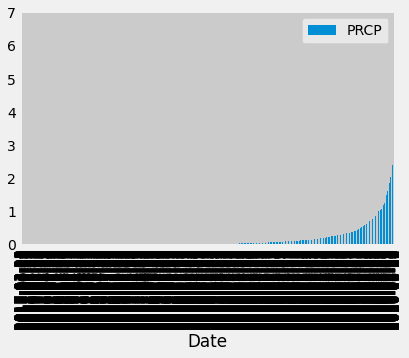

In [39]:
final_prcp_df.plot(kind="bar")


In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = final_prcp_df.describe()
summary_stats


,PRCP
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()